In [18]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess

# --------- Generate Input ----------
N = 500  # Number of points
k = 10
delta = 2.0
d = 2

mean = [0, 0]
cov = [[5, 1], [1, 5]]
points = np.random.multivariate_normal(mean, cov, N)
weights = np.random.uniform(1, 10, N)

with open('input.txt', 'w') as f:
    f.write(f"{N} {k} {delta} {d}\n")
    for i in range(N):
        f.write(f"{weights[i]} {points[i,0]} {points[i,1]}\n")

print("Input data written to input.txt")

Input data written to input.txt


In [ ]:
# --------- Compile and Run C++ CDT_basic Code ----------
# Compile the C++ code
print("🛠️ Compiling C++ code...")
compile_process = subprocess.run(["g++", "-o", "greedy_cdt", "CDT_basic.cpp"], capture_output=True, text=True)

if compile_process.returncode != 0:
    print("Compilation failed:")
    print(compile_process.stderr)
    exit(1)
else:
    print("Compilation successful!")

# Now Run with input redirection
print("🚀 Running the C++ executable with input.txt...")
with open('input.txt', 'r') as infile:
    run_process = subprocess.run(["./greedy_cdt"], stdin=infile, capture_output=True, text=True)

if run_process.returncode != 0:
    print("Execution failed:")
    print(run_process.stderr)
    exit(1)

🛠️ Compiling C++ code...
✅ Compilation successful!
🚀 Running the C++ executable with input.txt...


Output saved to output.txt


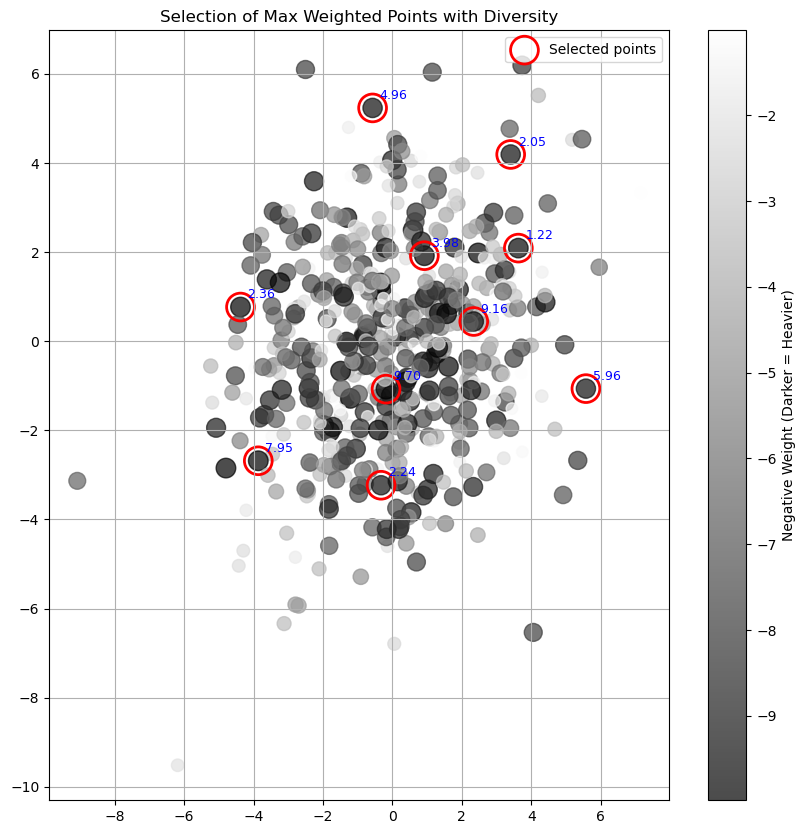

In [20]:
# Save output to output.txt
with open('output.txt', 'w') as outfile:
    outfile.write(run_process.stdout)

print("Output saved to output.txt")

# --------- Plotting ---------
selected_points = []
with open('output.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        if line.strip() == "Selected points:":
            continue
        parts = line.strip().split("->")[0]
        x, y = parts.strip("() ").split(",")
        selected_points.append((float(x), float(y)))

# Plot
selected_points = np.array(selected_points)

plt.figure(figsize=(10,10))

# Scatter plot: color and size based on weights
sc = plt.scatter(points[:,0], points[:,1], c=-weights, cmap='gray', 
                 s=50 + 150 * (weights/weights.max()), alpha=0.7)

# Colorbar
plt.colorbar(sc, label='Negative Weight (Darker = Heavier)')

# Circle selected points
plt.scatter(selected_points[:,0], selected_points[:,1], 
            facecolors='none', edgecolors='red', s=400, linewidths=2, label='Selected points')

# Optionally annotate weights
for i, (x, y) in enumerate(selected_points):
    plt.text(x+0.2, y+0.2, f"{weights[i]:.2f}", fontsize=9, color='blue')

plt.legend()
plt.title("Selection of Max Weighted Points with Diversity")
plt.grid(True)
plt.show()
